# COMP2501 Assignment 3
## Sibo Ding
## Spring 2023

### Environmental setup

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### 1. (1 points) Suppose that you roll a 6-sided die six times, compute the probability of not seeing a number bigger than 3.

$(\frac{3}{6})^6 = \frac{1}{64}$

### 2. (1 points) Suppose two NBA teams, say the Warriors and the Kings, are playing a seven game series (The first to win four games, therefore, wins the series). The Warriors are a better team and have a 70% chance of winning each game. What is the probability that the Kings win at least one game?

$Pr(Kings\ win\ at\ least\ one\ game) = 1 - Pr(King\ win\ no\ game) = 1 - Pr(Warriors\ win\ all\ four\ games) = 1 - 0.7^4 = 0.7599$

### 3. (2 points) Create a Monte Carlo simulation to confirm your answer to the previous question. Use `B <- 10000` simulations. Hint: use the following code to generate the results of the first four games: `kings_wins <- sample(c(0,1), 4, replace = TRUE, prob = c(0.7, 0.3))`. Noting that the Kings must win at least one of these four games.

In [2]:
B = 10000
np.random.seed(3)  # Fix the random number output
# np.random.choice: Generate a B*4 matrix, each element has 70% to be 0 and 30% to be 1 
# Sum up each row vector with 4 elements and check if "sum >= 1"
result = np.random.choice(2, size=(B, 4), p=[0.7, 0.3]).sum(axis=1) >= 1

# As "True==1" and "False==0", average is the probability of "True"
result.mean()

0.7612

### 4. (2 points) Suppose two NBA teams, say the Warriors and the Bucks, are playing a seven game championship series (The first to win four games, therefore, wins the series). The two teams are equally good so they each have a 50-50 chance of winning each game. If the Warriors lose the first game, what is the probability that they win the series?

To calculate the probability that Warriors win the series, we calculate the number of ways that Warriors win divided by the total number of ways among 6 games.  

Warriors need to win at least 4 games to win the series. If they win 4 games, they can lose 2 games before their first win, between any two wins, or after their forth win. Thus, it is equivalent to distributing 2 lost games to 5 intervals, which has $\binom{5+2-1}{2} = 15$ ways.  

Similarly, there are $\binom{6+1-1}{1} = 6$ ways if they win 5 games, and $1$ way if they win 6 games. In total, they have $15+6+1 = 22$ ways to win.

There are $2^6 = 64$ ways among 6 games. Therefore, the probability that Warriors win the series is $\frac{22}{64} = 0.3438$.  

References:  
https://en.wikipedia.org/wiki/Stars_and_bars_(combinatorics)  
STAT1603 - Ch2 - Unordered Selection with Replacement - “Stars and Bars”

### 5. (2 points) Create a Monte Carlo simulation to confirm your answer to the previous question. Use `B <- 10000` simulations.

In [3]:
B = 10000
np.random.seed(5)
result = np.random.randint(2, size=(B, 6)).sum(axis=1) >= 4

result.mean()

0.3414

### 6. (2 points) Suppose two NBA teams, say the Warriors and the Bucks, are playing a seven game championship series (The first to win four games, therefore, wins the series). The Warriors is better than the Bucks and has a p>0.5 chance of winning each game. Given a value p, use the function `sapply` to compute the probability of winning the series for the Bucks for `p <- seq(0.55, 0.95, 0.025)`. Then plot the result with `geom_histogram()`.

(array([7., 2., 1., 2., 1., 0., 1., 1., 1., 1.]),
 array([3.0000e-04, 3.9970e-02, 7.9640e-02, 1.1931e-01, 1.5898e-01,
        1.9865e-01, 2.3832e-01, 2.7799e-01, 3.1766e-01, 3.5733e-01,
        3.9700e-01]),
 <BarContainer object of 10 artists>)

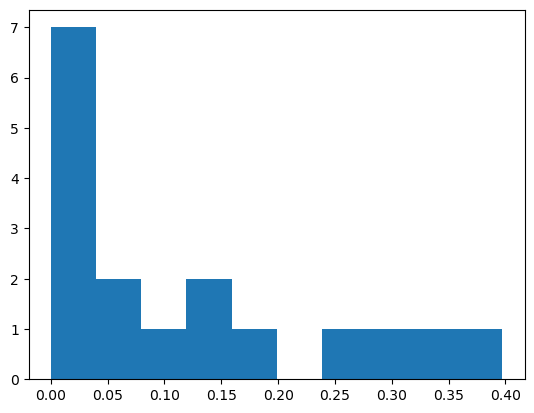

In [4]:
def prob_win(p):
    B = 10000
    result = np.random.choice(2, size=(B, 7), p=[p, 1-p]).sum(axis=1) >= 4
    return result.mean()

p = np.arange(0.55, 0.96, 0.025)  # "Stop (0.96)" in Python is excluded
plt.hist(list(map(prob_win, p)))

### 7. (1 points) Repeat the question above, but now keep the probability fixed at `p <- 0.7` and compute the probability of winning the series for the Bucks for different series lengths: best of 3 games, 5 games, 7 games,… Specifically, `N <- seq(3, 31, 2)`. Then plot the result with `geom_histogram()`.

(array([7., 2., 1., 1., 1., 1., 0., 1., 0., 1.]),
 array([0.0113 , 0.03193, 0.05256, 0.07319, 0.09382, 0.11445, 0.13508,
        0.15571, 0.17634, 0.19697, 0.2176 ]),
 <BarContainer object of 10 artists>)

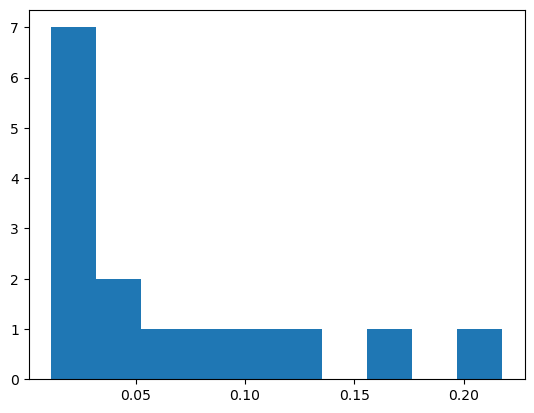

In [5]:
def prob_win(N, p=0.7):
    B = 10000
    result = np.random.choice(2, size=(B, N), p=[p, 1-p]).sum(axis=1) >= (N+1)/2
    return result.mean()

N = np.arange(3, 32, 2)  # "Stop (32)" in Python is excluded
plt.hist(list(map(prob_win, N)))

### 8. (2 points) The distribution of IQ scores is approximately normally distributed. The average is 100 and the standard deviation is 15. Suppose you want to know the distribution of the highest IQ among 10,000 people. Run a Monte Carlo simulation with `B=100` generating 10,000 IQ scores and keeping the highest. Then plot the result with `geom_histogram()`.

(array([15., 13., 20., 20.,  9., 10.,  6.,  3.,  2.,  2.]),
 array([150.02591957, 152.29645148, 154.56698339, 156.83751531,
        159.10804722, 161.37857913, 163.64911104, 165.91964295,
        168.19017487, 170.46070678, 172.73123869]),
 <BarContainer object of 10 artists>)

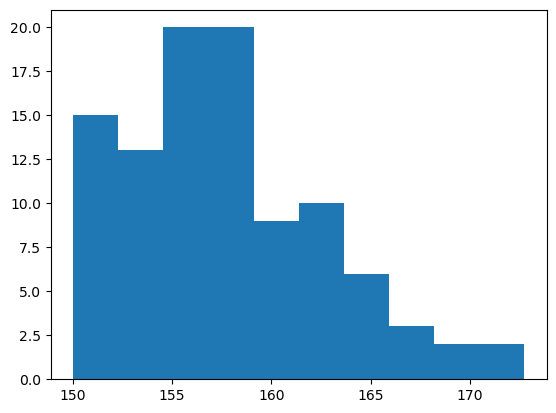

In [6]:
B = 100
np.random.seed(8)
highest_iq = np.random.normal(loc=100, scale=15, size=(B, 10000)).max(axis=1)
plt.hist(highest_iq)

### 9. (2 points) Load the `GaltonFamilies` data from the `HistData`. Make four separated scatterplots for heights between mothers and daughters, mothers and sons, fathers and daughters, and fathers and sons. Compute the correlation in heights between mothers and daughters, mothers and sons, fathers and daughters, and fathers and sons.

0.30516445132689507

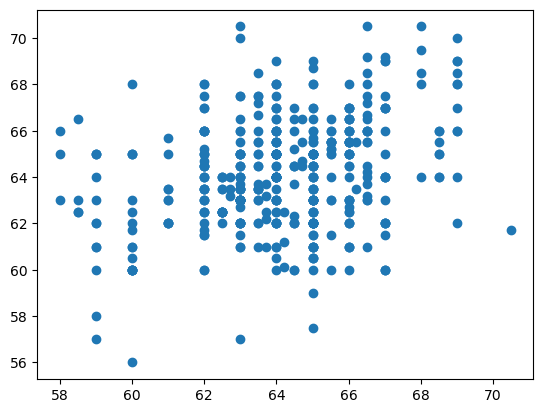

In [7]:
GaltonFamilies = pd.read_csv('GaltonFamilies.csv')

daughters = GaltonFamilies[GaltonFamilies['gender'] == 'female']
# Mothers and daughters
plt.scatter(x=daughters['mother'], y=daughters['childHeight'])
daughters['mother'].corr(daughters['childHeight'])

0.42843297684634873

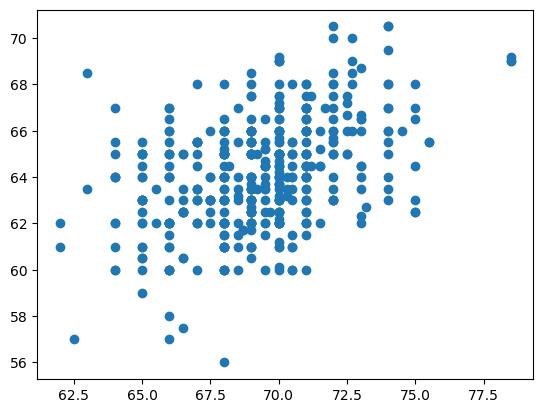

In [8]:
# Fathers and daughters
plt.scatter(x=daughters['father'], y=daughters['childHeight'])
daughters['father'].corr(daughters['childHeight'])

0.3230049836849058

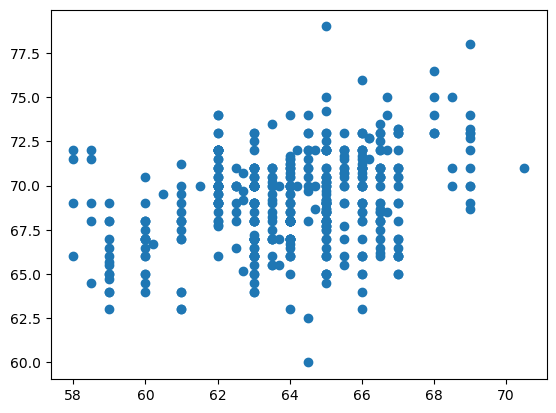

In [9]:
sons = GaltonFamilies[GaltonFamilies['gender'] == 'male']
# Mothers and sons
plt.scatter(x=sons['mother'], y=sons['childHeight'])
sons['mother'].corr(sons['childHeight'])

0.3923834966628355

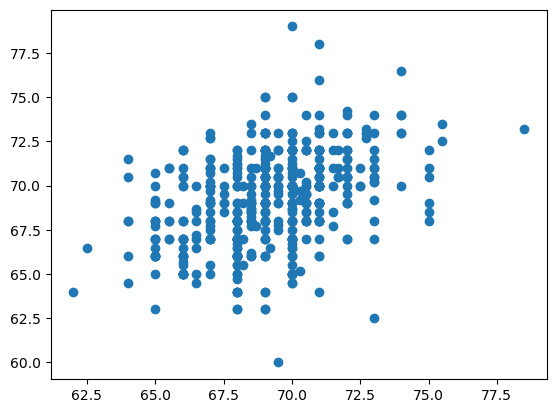

In [10]:
# Mothers and sons
plt.scatter(x=sons['father'], y=sons['childHeight'])
sons['father'].corr(sons['childHeight'])

### 10. (2 points) Load the `GaltonFamilies` data from the `HistData`. Create a dataset called `galton_heights` by randomly picking a daughter of each family. `galton_heights` should have two columns, including father's and daughter's height. Using the `lm` function to obtain the least squares estimates between the father's and daughter's height. What is the estimated model coefficients.

In [11]:
GaltonFamilies = pd.read_csv('GaltonFamilies.csv')

galton_heights = GaltonFamilies[GaltonFamilies['gender'] == 'female']\
    .groupby('family')\
    .sample(n=1, random_state=10)\
    [['father', 'childHeight']]\
    .rename(columns={'childHeight': 'daughter'})

import statsmodels.api as sm
y = galton_heights['daughter']
x = sm.add_constant(galton_heights['father'])
lin_reg = sm.OLS(y, x).fit()
print(lin_reg.params)

const     37.747994
father     0.378475
dtype: float64


### 11. (17 points) Essay: (From Prof. RB Luo) In the midterm exam, we tried something different. The use of RStudio was allowed. The use of Google and ChatGPT was allowed. The use of instant messengers was allowed. After all, as I mentioned in my lecture, if you can only take one thing away from this course, make it “knowing how to get started when given a data science problem”. But I am unsure how well the trial has worked out, especially from my students’ perspective. If you have attended the midterm exam, how do you like the exam form? How would you like to improve the questions to help you to achieve the learning goals? If I ask you to be my TA and help me design the midterm exam for next year’s class, what would you suggest? More generally, what improvements to the course would you suggest so I can do better the next year? Let me know your thoughts because when one teaches, two learn.

Personally, I think this exam does not satisfy the objective mentioned. It is still within the traditional exam boundary that "practice to memorize detailed knowledge proficiently". And the number of questions is not so large that students cannot finish if they Google every question.  

Let me give a simple example for my understanding of this objective: In Python, to know how to copy a mutable list `list2` from `list1`, I can Google. Then, I modify an element in `list1` to see whether it has been changed in `list2`. Here, I do not (or need not) memorize the method of copy; but I know the basic logic to check mutability. This was not taught in COMP1117, rather, it was a real experience in my previous class: my teacher typed code with bugs, and I witnessed how he broke his code line by line, checked every basic logic.  

Another similar situation is when we (college students or graduates) face an elementary-school problem, probably we cannot memorize every detailed knowledge. But I think no one will claim he/she is unable to solve the problem. Or at least everyone knows basic macro guidelines to solve it.  

John Keating in *Dead Poets Society* said: "I always thought the idea of education was to learn to think for yourself." Will Hunting in *Good Will Hunting* said: "You dropped 150 grand on a fucking education you could have got for $1.50 in late charges at the public library." Haowen Ma in *Looking Up* said: "I want him to learn not only the knowledge, but also the mindset. The methods." Inspired by them, I think the idea of education is knowing how to solve problems using logic, and this should be taught and tested. It can be migrated (extended) to other new problem-solving scenarios, and is more difficult to be substituted by Google or GPT. For example, how to analyze and decompose a big task? What should students do when they encounter problems in practice not mentioned in textbooks? How to ask Google or GPT effectively (if it is an ability)? etc.  

I can tell that your teaching is "task-oriented" many times, so I know what I learn for. But I believe you can train your students to have even broader mindset (also your mindset)! The assignments and labs are very heuristic (although some are from the textbook), that students can follow detailed instructions step by step. At the same time, I find them not instructing too much and I can learn a lot.  

I am always motivated by the first sentence of HKU centennial anthem. However, pursuing real education will severely hurt the GPA, and most students opt for the latter (I have paid the cost for the former), so I think your path will not be easy. No matter what, wish you and I good luck on the road of teaching and learning : )